In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dataset = pd.read_csv('classification_data6.csv')

In [110]:
dataset.head()

,x_1,x_2,y
0,1.894825,9.832525,1
1,6.684643,2.212985,0
2,1.736741,9.659580,1
3,2.473089,8.324725,1
4,8.082036,3.278941,0


In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     300 non-null    float64
 1   x_2     300 non-null    float64
 2   y       300 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.1 KB


In [112]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
x_1,300.0,4.309806,2.401001,-1.205798,2.159925,4.396897,6.44403,9.371559
x_2,300.0,6.568611,3.140679,1.465096,3.606872,6.329113,9.56352,12.034243
y,300.0,0.500000,0.500835,0.000000,0.000000,0.500000,1.00000,1.000000


Text(0, 0.5, 'x2')

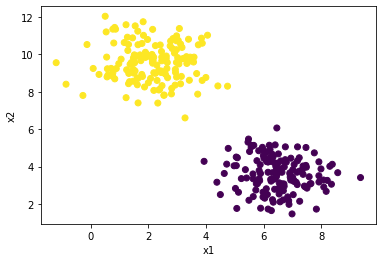

In [113]:
plt.scatter(dataset.x_1, dataset.x_2, c=dataset.y,label='ClassifiData')
plt.xlabel("x1")
plt.ylabel("x2")


In [114]:
def f(X,W,b):
    d=len(W)
    a=b
    for i in range(d):
        a+=X[i]*W[i]
    return a

In [115]:
def sign(X,W,b):
    if(f(X,W,b) >=0.0):
        return 1
    return 0

In [116]:
def loss(X,Y,W,b):
    n=len(Y)
    loss=0
    for i in range(n):
            y_pred=sign(X[i],W,b)
            if(y_pred!=Y[i]):
                loss+=1
    loss=loss/float(n)
    return loss

In [117]:
import random
def perceptron(X,Y,learning_rate):
    d=2
    n=len(Y)
    W=np.zeros((d,1))
    b=0
    error=loss(X,Y,W,b)
    loss_values=[] 
    loss_values.append(error)
    while(error!=0):
        for i in range(0,n):

            y_pred=sign(X[i],W,b)
            if(y_pred!=Y[i]):
                for j in range(d):
                    W[j]+=learning_rate*(Y[i]-y_pred)*X[i][j]
                b+=learning_rate*(Y[i]-y_pred)
        error=loss(X,Y,W,b)
        loss_values.append(error)
        
    return W,b,loss_values
    
    
    

In [118]:
datatrain=dataset.sample(frac=0.70,random_state=1234)
datatest=dataset.drop(datatrain.index)
X_train=np.array(datatrain.iloc[:, :-1])
X_test=np.array(datatest.iloc[:, :-1])
Y_train=np.array(datatrain.iloc[:, -1])
Y_test=np.array(datatest.iloc[:, -1])

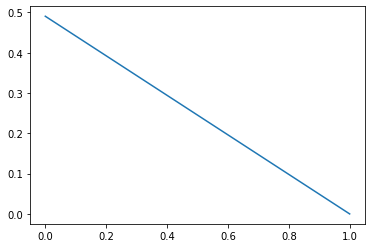

In [119]:
W,b,erros=perceptron(X_train,Y_train,0.01)
plt.plot(erros)

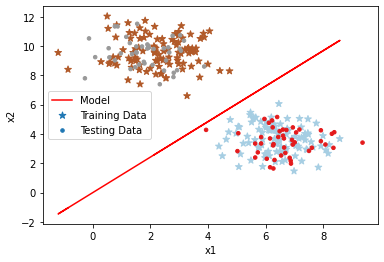

In [120]:

def hypotheses(x,w,b):
            return -(b + w[0]*x)/w[1] 
plt.plot(X_train[:,0], [hypotheses(x,W,b) for x in X_train[:,0] ], 'r', label='Model')
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train,label='Training Data',marker='*',cmap='Paired',s=50)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test,label='Testing Data',marker=".",cmap='Set1',s=50)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=0)


In [121]:
Y_pred=[sign(x,W,b) for x in X_test ]
y_bar=(1/Y_test.shape[0])*np.sum(Y_test)
t1 = np.sum(pow(Y_pred - Y_test,2))
t2 = (np.sum(pow(Y_test-y_bar,2)))
acc = 1-(t1/t2)
print("accuracy with PLA:"+str(acc))

accuracy with PLA:1.0


In [34]:
dataset.loc[dataset.query('y == 1').sample(frac=0.07,random_state=134).index,'y']= 0 

Text(0, 0.5, 'x2')

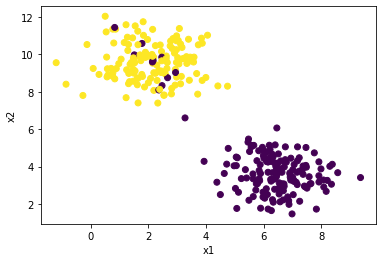

In [123]:
plt.scatter(dataset.x_1, dataset.x_2, c=dataset.y,label='ClassifiData')
plt.xlabel("x1")
plt.ylabel("x2")

In [124]:
def Ls(X,Y,W,b):
    n=len(Y)
    loss=0
    for i in range(n):
        loss+=(Y[i]-sign(X[i],W,b))**2
    loss=loss/float(n)
    return loss

In [125]:
def adaline(X,Y,T_max=1000):
    d=2
    n=len(Y)
    W=np.zeros((d,1))
    b=0
    history=[]
    error=Ls(X,Y,W,b)
    history.append(error)
    for move in range(T_max):
        for i in range(n):
            e=Y[i]-sign(X[i],W,b)
            if(e!=0):
                b=b+2*e
                for j in range(d):
                    W[j]=W[j]+2*e*X[i][j]
        error=Ls(X,Y,W,b)
        history.append(error)
        
    return W,b,history

In [126]:
datatrain=dataset.sample(frac=0.80,random_state=134)
datatest=dataset.drop(datatrain.index)
X_train=np.array(datatrain.iloc[:, :-1])
X_test=np.array(datatest.iloc[:, :-1])
Y_train=np.array(datatrain.iloc[:, -1])
Y_test=np.array(datatest.iloc[:, -1])

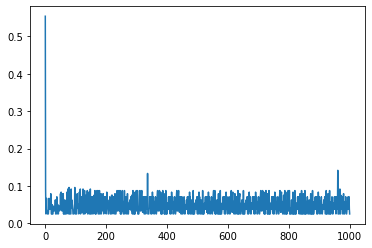

In [127]:
W,b,history=adaline(X_train,Y_train)
plt.plot(history)

In [128]:
W,b

(array([[-24.46036912],
        [ 37.63552289]]),
 -72)

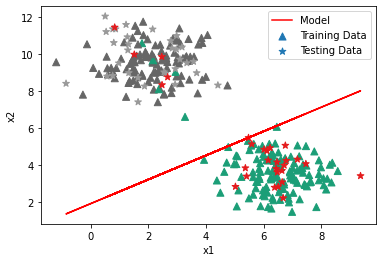

In [129]:
def hypotheses(x,w,b):
            return -(b + w[0]*x)/w[1] 
plt.plot(X_test[:,0], [hypotheses(x,W,b) for x in X_test[:,0] ], 'r', label='Model')
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train,label='Training Data',marker='^',cmap='Dark2',s=50)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test,label='Testing Data',marker="*",cmap='Set1',s=50)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=0)

In [130]:
Y_pred=[sign(x,W,b) for x in X_test ]
y_bar=(1/Y_test.shape[0])*np.sum(Y_test)
t1 = np.sum(pow(Y_pred - Y_test,2))
t2 = (np.sum(pow(Y_test-y_bar,2)))
acc = 1-(t1/t2)
print("accuracy with adaline:"+str(acc))

accuracy with adaline:0.6651785714285715


In [131]:
def pocket(X,Y,T_max=1000):
    d=2
    n=len(Y)
    W=np.zeros((d,1))
    b=0
    Ws=W.copy()
    bs=b
    error=loss(X,Y,W,b)
    error_before=error
    loss_values=[] 
    loss_values.append(error)
    for ite in range(T_max):
        for i in range(0,n):
            y_pred=sign(X[i],W,b)
            if(y_pred!=Y[i]):
                for j in range(d):
                    W[j]+=(Y[i]-y_pred)*X[i][j]
                b+=(Y[i]-y_pred)
        error=loss(X,Y,W,b)
        if(error<error_before):
            Ws=W.copy()
            bs=b
            loss_values.append(error)
        error_before=error
    return Ws,bs,loss_values
    
    

In [132]:
datatrain=dataset.sample(frac=0.70,random_state=14)
datatest=dataset.drop(datatrain.index)
X_train=np.array(datatrain.iloc[:, :-1])
X_test=np.array(datatest.iloc[:, :-1])
Y_train=np.array(datatrain.iloc[:, -1])
Y_test=np.array(datatest.iloc[:, -1])

In [133]:
Ws,bs,history_s=pocket(X_train,Y_train)

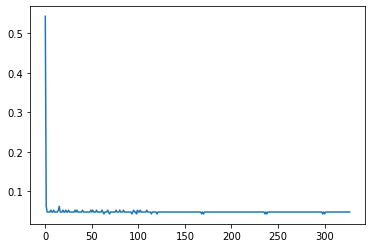

In [134]:
plt.plot(history_s)

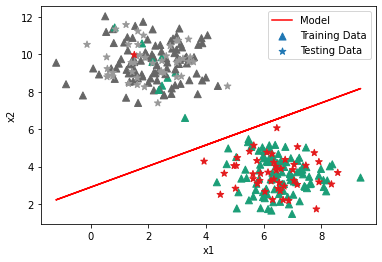

In [135]:
def hypotheses(x,w,b):
            return -(b + w[0]*x)/w[1] 
plt.plot(X_train[:,0], [hypotheses(x,Ws,bs) for x in X_train[:,0] ], 'r', label='Model')
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train,label='Training Data',marker='^',cmap='Dark2',s=50)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test,label='Testing Data',marker="*",cmap='Set1',s=50)
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=0)

In [136]:
Y_pred=[sign(x,Ws,bs) for x in X_test ]
y_bar=(1/Y_test.shape[0])*np.sum(Y_test)
t1 = np.sum(pow(Y_pred - Y_test,2))
t2 = (np.sum(pow(Y_test-y_bar,2)))
acc = 1-(t1/t2)
print("accuracy with pocket:"+str(acc))

accuracy with pocket:0.9554675903018308


# Logistic regression

In [35]:
data3 = pd.read_csv('classification_data6.csv')

In [36]:
# data3.x_1= [(x-np.min(data3.x_1))/(np.max(data3.x_1)-np.min(data3.x_1)) for x in data3.x_1]
# data3.x_2= [(y - np.min(data3.x_2))/(np.max(data3.x_2)-np.min(data3.x_2)) for y in data3.x_2]
# datatrain=data3.sample(frac=0.70,random_state=24)
# datatest=data3.drop(datatrain.index)
# X_train=np.array(datatrain.iloc[:, :-1])
# X_test=np.array(datatest.iloc[:, :-1])
# Y_train=np.array(datatrain.iloc[:, -1])
# Y_test=np.array(datatest.iloc[:, -1])
dataset.x_1= [(x-np.min(dataset.x_1))/(np.max(dataset.x_1)-np.min(dataset.x_1)) for x in dataset.x_1]
dataset.x_2= [(y - np.min(dataset.x_2))/(np.max(dataset.x_2)-np.min(dataset.x_2)) for y in dataset.x_2]
datatrain=dataset.sample(frac=0.70,random_state=24)
datatest=dataset.drop(datatrain.index)
X_train=np.array(datatrain.iloc[:, :-1])
X_test=np.array(datatest.iloc[:, :-1])
Y_train=np.array(datatrain.iloc[:, -1])
Y_test=np.array(datatest.iloc[:, -1])


In [37]:
import math 
def sigmoid(x,w,b):
    d=len(w)
    z=b
    for i in range(d):
        z+=x[i]*w[i] 
    return 1.0/(1+math.exp(-z))

In [38]:
def err(X,Y,w,b):
    n=len(Y)
    Ls=0
    for i in range(n):
        Ls+=Y[i]*math.log(sigmoid(X[i],w,b))+(1-Y[i])*math.log(1-sigmoid(X[i],w,b))
    Ls=-Ls/float(n)
    return Ls

In [39]:
def gradient_log(X,Y,w,b):
    d=len(w)
    dw=np.zeros((d,1))
    db=0
    n=len(Y)
    for i in range(n):
        for j in range(d):
            dw[j]+=(sigmoid(X[i],w,b)-Y[i])*X[i][j]    
        db+=(sigmoid(X[i],w,b)-Y[i])
    dw=[x / float(n) for x in dw]
    db=db/float(n)
    return dw,db

In [40]:
def gradient_descent_log(X,Y,alpha,n_iter):
    d=2
    w=np.zeros((d,1))
    b=0
    loss=[]
    loss.append(err(X,Y,w,b))
    error=err(X,Y,w,b)
    print("error before : " ,err(X,Y,w,b))
    for i in range(n_iter):
        dw,db = gradient_log(X,Y,w,b)
        
        b = b - alpha * db
        for j in range(d):
            w[j] = w[j] - alpha * dw[j]
        error=err(X,Y,w,b)
        loss.append(error)
    print("error after : " ,err(X,Y,w,b))

    return w,b,loss

error before :  0.6931471805599465
error after :  0.48543291609863964


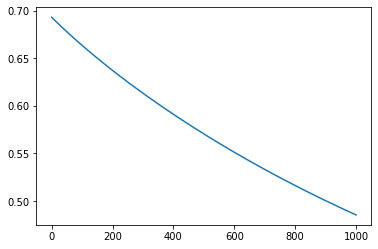

In [41]:
w,b,loss=gradient_descent_log(X_train,Y_train,0.01,1000)
w,b
plt.plot(loss)

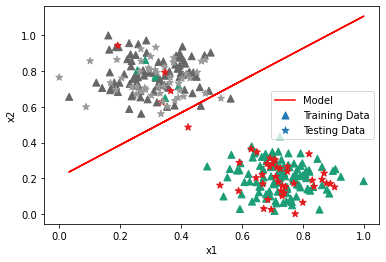

In [42]:
def hypotheses(x,w,b):
            return -(b + w[0]*x)/w[1] 
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train,label='Training Data',marker='^',cmap='Dark2',s=50)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test,label='Testing Data',marker="*",cmap='Set1',s=50)
plt.plot(X_train[:,0], [hypotheses(x,w,b) for x in X_train[:,0] ], 'r', label='Model')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=0)

In [43]:
def predict(X,w,b):
    n=len(X[:,0])
    Y_pred=[]
    for i in range(n):
        if(sigmoid(X[i],w,b)>=0.5):
            Y_pred.append(1)
        else :
             Y_pred.append(0)
    return Y_pred

In [44]:
Y_pred=predict(X_test,w,b)

In [45]:
y_bar=(1/Y_test.shape[0])*np.sum(Y_test)
t1 = np.sum(pow(Y_pred - Y_test,2))
t2 = (np.sum(pow(Y_test-y_bar,2)))
acc = 1-(t1/t2)
print("accuracy (logistic regression):"+str(acc))

accuracy (logistic regression):0.7773379515091539


In [56]:
lamda=0.1
def err_reg(X,Y,w,b):
    n=len(Y)
    d=len(w)
    Ls=0
    reg=0
    for j in range(d):
        reg+=(lamda/2)*w[j]
    for i in range(n):
        Ls+=Y[i]*math.log(sigmoid(X[i],w,b))+(1-Y[i])*math.log(1-sigmoid(X[i],w,b))+reg
    Ls=-Ls/float(n)
    return Ls

In [57]:
def gradient_log_reg(X,Y,w,b):
    d=len(w)
    dw=np.zeros((d,1))
    db=0
    n=len(Y)
    for i in range(n):
        for j in range(d):
            dw[j]+=(sigmoid(X[i],w,b)-Y[i])*X[i][j] + lamda * w[j]    
        db+=(sigmoid(X[i],w,b)-Y[i])  + lamda * b
    dw=[x / float(n) for x in dw]
    db=db/float(n)
    return dw,db

In [58]:
def gradient_descent_log_reg(X,Y,alpha,n_iter):
    d=2
    w=np.zeros((d,1))
    b=0
    loss=[]
    loss.append(err_reg(X,Y,w,b))
    error=err_reg(X,Y,w,b)
    print("error before : " ,err_reg(X,Y,w,b))
    for i in range(n_iter):
        dw,db = gradient_log_reg(X,Y,w,b)
        
        b = b - alpha * db
        for j in range(d):
            w[j] = w[j] - alpha * dw[j]
        error=err_reg(X,Y,w,b)
        loss.append(error)
    print("error after : " ,err_reg(X,Y,w,b))

    return w,b,loss

error before :  [0.69314718]
error after :  [0.50050043]


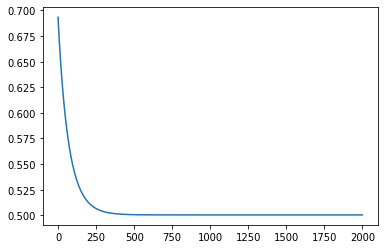

In [59]:
w,b,loss=gradient_descent_log_reg(X_train,Y_train,0.1,2000)
w,b
plt.plot(loss)

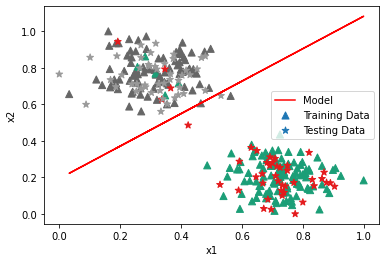

In [60]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train,label='Training Data',marker='^',cmap='Dark2',s=50)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test,label='Testing Data',marker="*",cmap='Set1',s=50)
plt.plot(X_train[:,0], [hypotheses(x,w,b) for x in X_train[:,0] ], 'r', label='Model')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc=0)